<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/Electro%20Pi%20Scholarship/Telecom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages Importing


In [ ]:
!pip install mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import os
import seaborn as sns
import xgboost as xgb

from scipy import stats
from scipy.stats import randint
from  sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling  import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score ,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive')

In [ ]:
path = '/content/drive/MyDrive'

In [ ]:
path_train = os.path.join(path, 'churn-bigml-80.csv')
path_test = os.path.join(path,'churn-bigml-20.csv')

## Loading the data Files into a pandas dataframe


In [ ]:
train_df = pd.read_csv(path_train)
test_df = pd.read_csv(path_test)

## Showing the Head of the Data


In [ ]:
# train dataset
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# test dataset
test_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


##Exploratory Data Analysis


### Descriptive Statistics


In [ ]:
# train dataset
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,2666,51,WV,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,2666.0,NaN,NaN,NaN,100.620405,39.563974,1.0,73.0,100.0,127.0,243.0
Area code,2666.0,NaN,NaN,NaN,437.43886,42.521018,408.0,408.0,415.0,510.0,510.0
International plan,2666,2,No,2396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,2666,2,No,1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,2666.0,NaN,NaN,NaN,8.021755,13.612277,0.0,0.0,0.0,19.0,50.0
Total day minutes,2666.0,NaN,NaN,NaN,179.48162,54.21035,0.0,143.4,179.95,215.9,350.8
Total day calls,2666.0,NaN,NaN,NaN,100.310203,19.988162,0.0,87.0,101.0,114.0,160.0
Total day charge,2666.0,NaN,NaN,NaN,30.512404,9.215733,0.0,24.38,30.59,36.7,59.64
Total eve minutes,2666.0,NaN,NaN,NaN,200.386159,50.951515,0.0,165.3,200.9,235.1,363.7


In [ ]:
# test dataset
test_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,667,51,AZ,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,667.0,NaN,NaN,NaN,102.841079,40.81948,1.0,76.0,102.0,128.0,232.0
Area code,667.0,NaN,NaN,NaN,436.157421,41.783305,408.0,408.0,415.0,415.0,510.0
International plan,667,2,No,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,667,2,No,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,667.0,NaN,NaN,NaN,8.407796,13.99448,0.0,0.0,0.0,20.0,51.0
Total day minutes,667.0,NaN,NaN,NaN,180.948126,55.508628,25.9,146.25,178.3,220.7,334.3
Total day calls,667.0,NaN,NaN,NaN,100.937031,20.39679,30.0,87.5,101.0,115.0,165.0
Total day charge,667.0,NaN,NaN,NaN,30.761769,9.436463,4.4,24.86,30.31,37.52,56.83
Total eve minutes,667.0,NaN,NaN,NaN,203.355322,49.719268,48.1,171.05,203.7,236.45,361.8


### Correlation


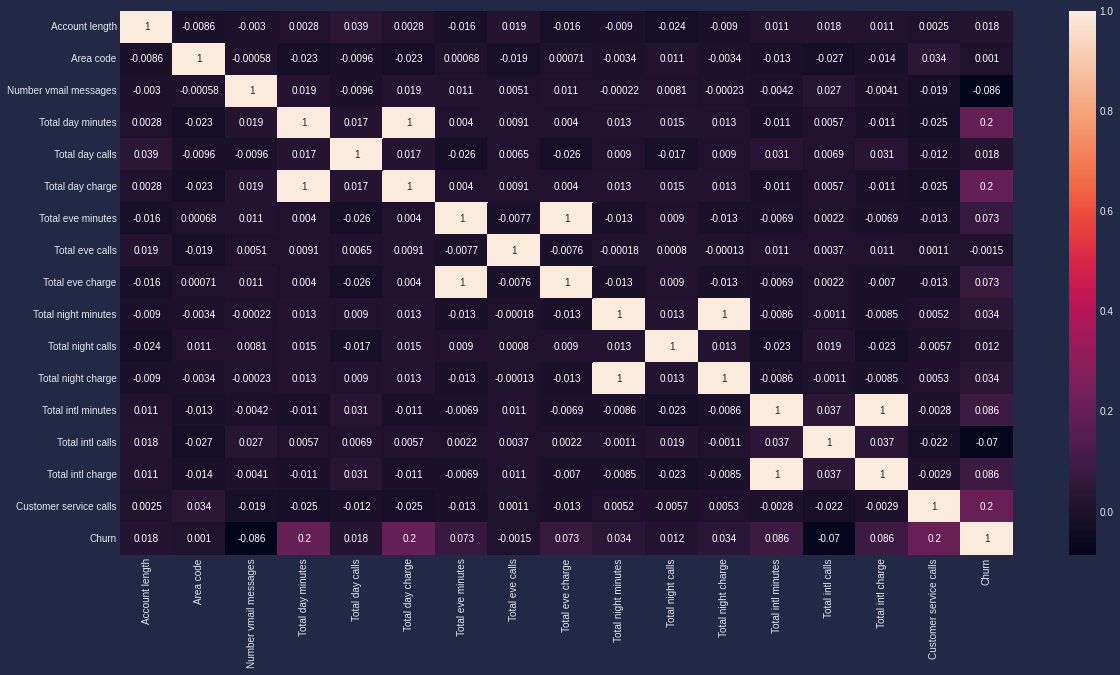

In [ ]:
# train dataset
plt.style.use("cyberpunk")
cor = train_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

plt.show()

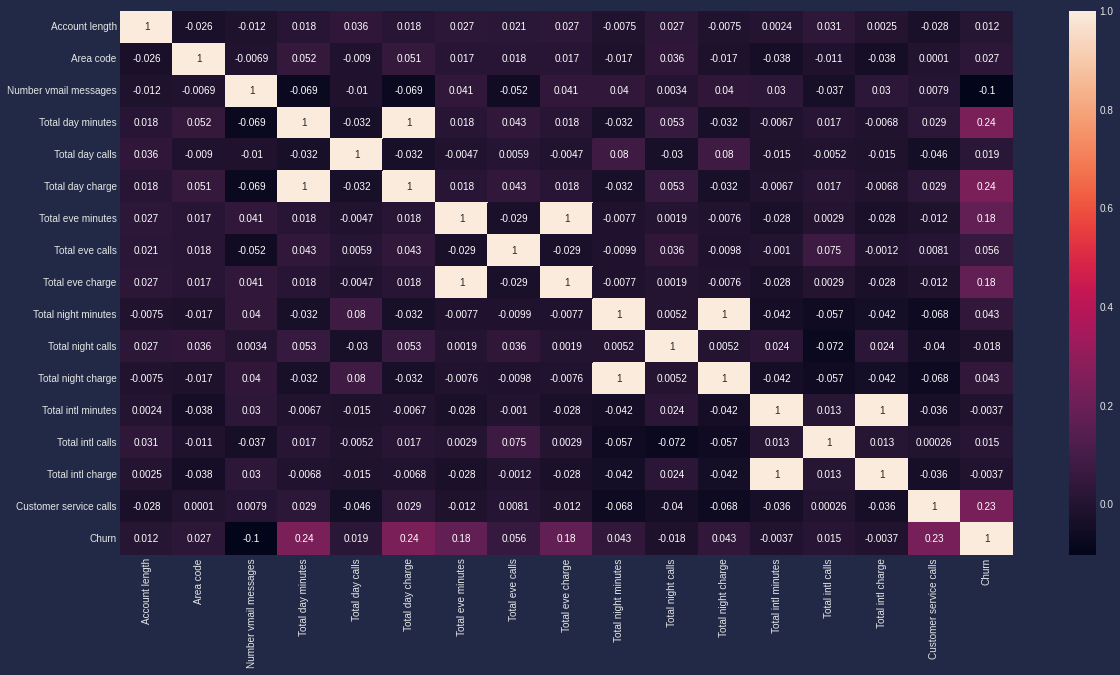

In [ ]:
# test dataset
plt.style.use("cyberpunk")
cor = test_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

plt.show()


### Show infos of features

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

### Features Disturbtions


In [ ]:
train_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
# International plan
label = train_df['International plan'].unique()
data = train_df['International plan'].value_counts()

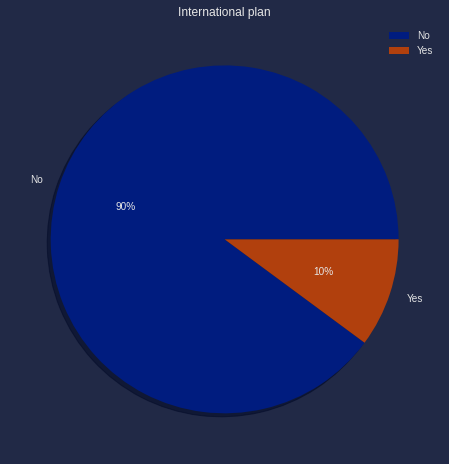

In [ ]:
colors = sns.color_palette('dark')
plt.figure(figsize=(8,8))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.title('International plan')
plt.show()

In [ ]:
# State
label = train_df['State'].unique()
data = train_df['State'].value_counts()

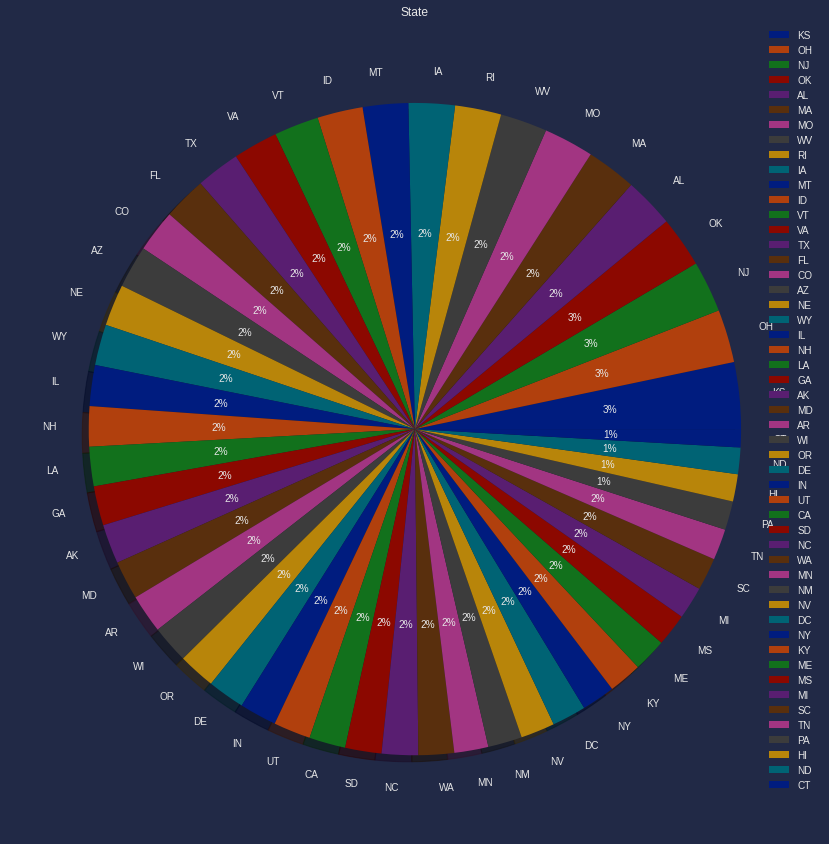

In [ ]:
colors = sns.color_palette('dark')
plt.figure(figsize=(15,15))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.title('State')
plt.show()

In [ ]:
# Voice mail plan
label = train_df['Voice mail plan'].unique()
data = train_df['Voice mail plan'].value_counts()

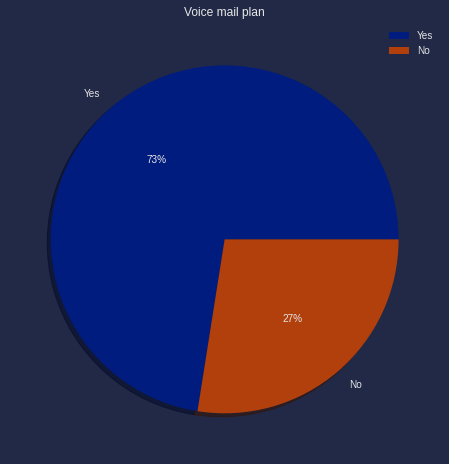

In [ ]:
colors = sns.color_palette('dark')
plt.figure(figsize=(8,8))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.title('Voice mail plan')
plt.show()

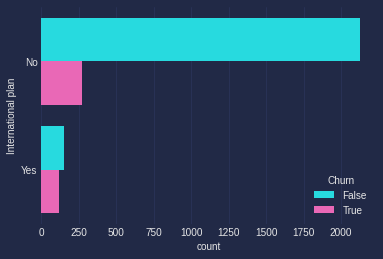

In [ ]:
sns.countplot(y=train_df['International plan'],hue=train_df['Churn'])


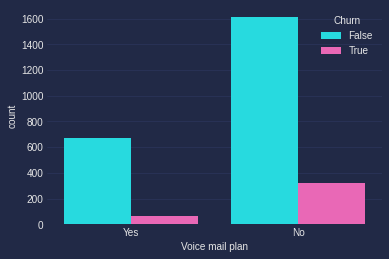

In [ ]:
sns.countplot(x=train_df['Voice mail plan'],hue=train_df['Churn'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


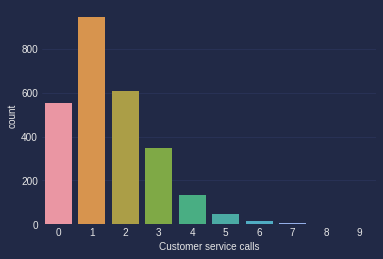

In [ ]:
sns.countplot(train_df['Customer service calls'])

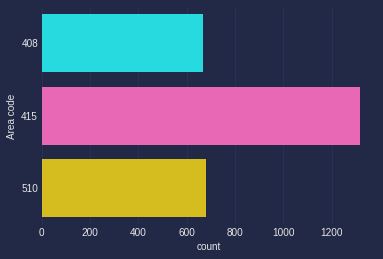

In [ ]:
sns.countplot(y=train_df['Area code'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


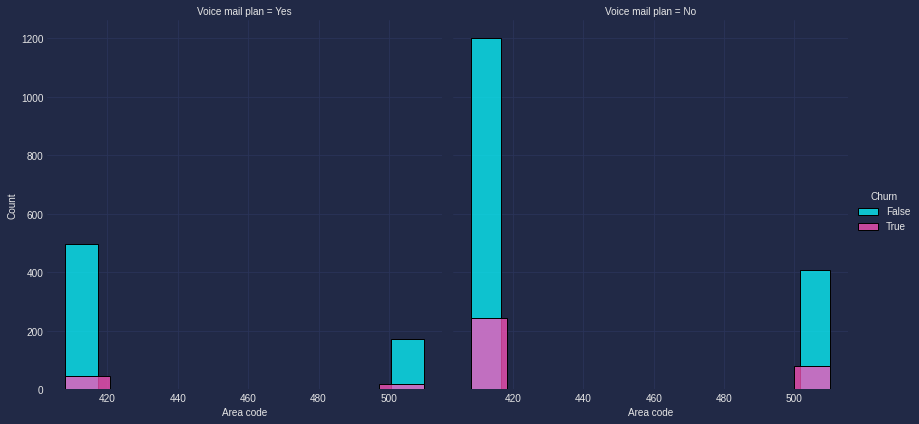

In [ ]:
sns.FacetGrid(train_df, col='Voice mail plan',hue='Churn', size=6) \
   .map(sns.histplot,'Area code') \
   .add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


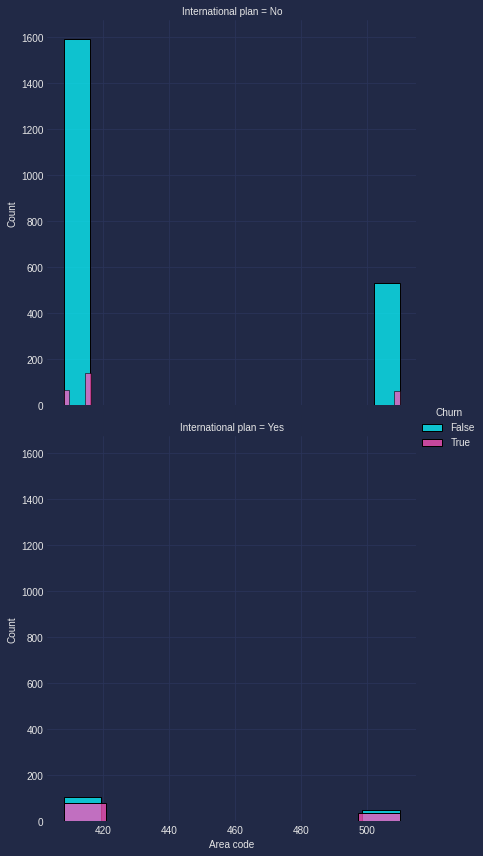

In [ ]:
sns.FacetGrid(train_df, row='International plan',hue='Churn', size=6) \
   .map(sns.histplot,'Area code') \
   .add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


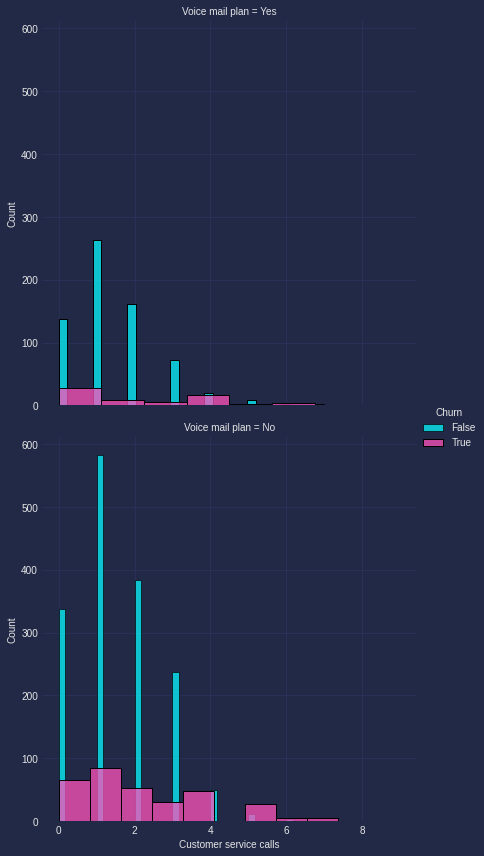

In [ ]:
sns.FacetGrid(train_df, row='Voice mail plan',hue='Churn', size=6) \
   .map(sns.histplot,'Customer service calls') \
   .add_legend()

### Check a Missing Value

In [ ]:
# train dataset
print(train_df.isnull().sum().sort_values(ascending=False))

State                     0
Account length            0
Customer service calls    0
Total intl charge         0
Total intl calls          0
Total intl minutes        0
Total night charge        0
Total night calls         0
Total night minutes       0
Total eve charge          0
Total eve calls           0
Total eve minutes         0
Total day charge          0
Total day calls           0
Total day minutes         0
Number vmail messages     0
Voice mail plan           0
International plan        0
Area code                 0
Churn                     0
dtype: int64


In [ ]:
# test dataset
print(test_df.isnull().sum().sort_values(ascending=False))

State                     0
Account length            0
Customer service calls    0
Total intl charge         0
Total intl calls          0
Total intl minutes        0
Total night charge        0
Total night calls         0
Total night minutes       0
Total eve charge          0
Total eve calls           0
Total eve minutes         0
Total day charge          0
Total day calls           0
Total day minutes         0
Number vmail messages     0
Voice mail plan           0
International plan        0
Area code                 0
Churn                     0
dtype: int64


### examine the numerical features.


In [ ]:
numeric_features = train_df.select_dtypes(include=[np.number])
print(numeric_features.columns)
print('****************************************************************************')
print(f'There is {numeric_features.shape[1]} numeric features.')

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')
****************************************************************************
There is 16 numeric features.


### examine the categorical features.

In [ ]:
categorical_features = train_df.select_dtypes(include=[np.object_,"category"])
print(categorical_features.columns)
print('****************************************************************************')
print(f'There is {categorical_features.shape[1]} categorical features.')

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')
****************************************************************************
There is 3 categorical features.


In [ ]:
bol_features = train_df.select_dtypes(include=[np.bool_])
print(bol_features.columns)
print('****************************************************************************')
print(f'There is {bol_features.shape[1]} bol features.')

Index(['Churn'], dtype='object')
****************************************************************************
There is 1 bol features.


### Handling bool datatype

In [ ]:
train_df.replace({False:0 , True:1},inplace=True)

test_df.replace({False:0 , True:1},inplace=True)

### Handling object datatype

In [ ]:
le = LabelEncoder()

cat_fea= train_df.select_dtypes(include=['object']).columns.tolist()
train_df[cat_fea] = train_df[cat_fea].apply(le.fit_transform)

cat_fea= test_df.select_dtypes(include=['object']).columns.tolist()
test_df[cat_fea] = test_df[cat_fea].apply(le.fit_transform)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   int64  
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   int64  
 4   Voice mail plan         2666 non-null   int64  
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    int64  
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    int64  
 4   Voice mail plan         667 non-null    int64  
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

## Data Splitting


In [ ]:
X_train = train_df.drop('Churn',axis=1)
y_train = train_df['Churn']

X_test = test_df.drop('Churn',axis=1)
y_test = test_df['Churn']

print(f' Shape of X_train: {X_train.shape} & Shape of X_test: {X_test.shape}')
print(f' Shape of y_train: {y_train.shape} & Shape of y_test: {y_test.shape}')

 Shape of X_train: (2666, 19) & Shape of X_test: (667, 19)
 Shape of y_train: (2666,) & Shape of y_test: (667,)


## Data Scaling


In [ ]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)

X_test = scl.transform(X_test)

# Building Models

In [ ]:
def select_model(model,x_train,y_train,x_test,y_test):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  print('Accuracy score of Train: {}'.format(accuracy_score(y_train,y_pred_train)*100))
  print('Accuracy score of Test: {}'.format(accuracy_score(y_test,y_pred)*100))


In [ ]:
def hyper_parameter_tuning(model,parameters,x_train,y_train,x_test,y_test):
  tuning = search = RandomizedSearchCV(estimator = model,         
                            param_distributions= parameters,       
                           scoring = 'accuracy',          
                           cv = 5,                       
                           n_jobs = 1,
                          verbose=0)
  tuning.fit(x_train,y_train)
  print("best accuracy is :" , tuning.best_score_ * 100)
  print(search.best_params_) 

  model = tuning.best_estimator_
  model.fit(x_train, y_train)

  val_score = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
  y_pred = model.predict(x_test)
  print('\n*********************************************************************************** \n')
  print("Validation score: %.5f%% (%.5f%%)" % (val_score.mean()*100.0, val_score.std()*100.0))
  print('Accuracy score: {}'.format(accuracy_score(y_test,y_pred)*100))
  print('\n*********************************************************************************** \n')
  print('confusion matrix: \n')
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=model.classes_)
  disp.plot()
  plt.show()

  print('\n*********************************************************************************** \n')
  print('classification report: \n')
  print(classification_report(y_test, y_pred))


### Logistic Regression

In [ ]:
lg_clf = LogisticRegression(random_state = 0)
select_model(lg_clf,X_train,y_train,X_test,y_test)

Accuracy score of Train: 86.23405851462866
Accuracy score of Test: 85.30734632683658


In [ ]:
lg_clf.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

best accuracy is : 86.19635867923071
{'multi_class': 'auto', 'C': 0.4}

*********************************************************************************** 

Validation score: 86.19636% (0.53003%)
Accuracy score: 85.30734632683658

*********************************************************************************** 

confusion matrix: 



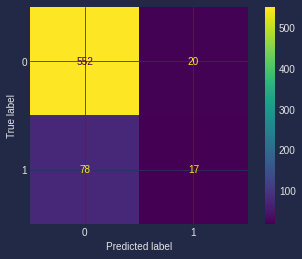


*********************************************************************************** 

classification report: 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       572
           1       0.46      0.18      0.26        95

    accuracy                           0.85       667
   macro avg       0.67      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



In [ ]:
# hyperparameter tuning
par = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
       'multi_class':['auto','ovr','multinomial']}



hyper_parameter_tuning(lg_clf,par,X_train,y_train,X_test,y_test)

### Decision Tree Classifier

In [ ]:
dt_clf = DecisionTreeClassifier(random_state = 0)
select_model(dt_clf,X_train,y_train,X_test,y_test)

Accuracy score of Train: 100.0
Accuracy score of Test: 91.60419790104947


best accuracy is : 93.39875343437963
{'splitter': 'best', 'random_state': 42, 'max_depth': 7, 'criterion': 'gini'}

*********************************************************************************** 

Validation score: 93.39875% (0.89552%)
Accuracy score: 94.15292353823088

*********************************************************************************** 

confusion matrix: 



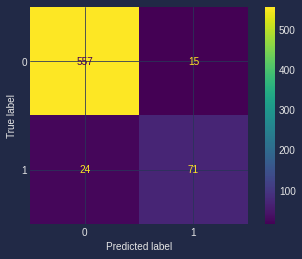


*********************************************************************************** 

classification report: 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       572
           1       0.83      0.75      0.78        95

    accuracy                           0.94       667
   macro avg       0.89      0.86      0.88       667
weighted avg       0.94      0.94      0.94       667



In [ ]:
# hyperparameter tuning
parameters= {'criterion':['gini', 'entropy'],
             'max_depth':[3,5,7],'splitter':['best', 'random'],
            'random_state': [0,42]}

hyper_parameter_tuning(dt_clf,parameters,X_train,y_train,X_test,y_test)

### K-Neighbors Classifier

In [ ]:
knn_clf = KNeighborsClassifier()
select_model(knn_clf, X_train,y_train,X_test, y_test)

Accuracy score of Train: 92.04801200300075
Accuracy score of Test: 89.05547226386807


best accuracy is : 88.71000836196782
{'weights': 'uniform', 'p': 2, 'n_neighbors': 5, 'algorithm': 'auto'}

*********************************************************************************** 

Validation score: 88.71001% (0.57915%)
Accuracy score: 89.05547226386807

*********************************************************************************** 

confusion matrix: 



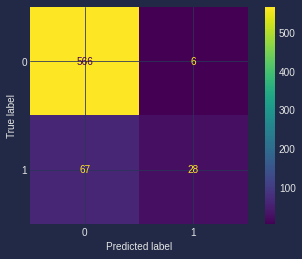


*********************************************************************************** 

classification report: 

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       572
           1       0.82      0.29      0.43        95

    accuracy                           0.89       667
   macro avg       0.86      0.64      0.69       667
weighted avg       0.88      0.89      0.87       667



In [ ]:
# hyperparameter tuning

parameters= {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'n_neighbors':[3,5,7],'weights':['uniform', 'distance'],'p':[2,3,5,6,7]}

hyper_parameter_tuning(knn_clf,parameters,X_train,y_train,X_test,y_test)



### SVM Classifier

In [ ]:
svm_clf = SVC(random_state = 0) 
select_model(svm_clf, X_train,y_train,X_test, y_test)

Accuracy score of Train: 94.7111777944486
Accuracy score of Test: 91.904047976012


best accuracy is : 91.74828368854129
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 3}

*********************************************************************************** 

Validation score: 91.74828% (1.01066%)
Accuracy score: 92.95352323838081

*********************************************************************************** 

confusion matrix: 



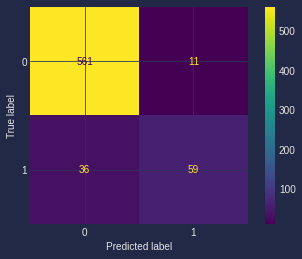


*********************************************************************************** 

classification report: 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       572
           1       0.84      0.62      0.72        95

    accuracy                           0.93       667
   macro avg       0.89      0.80      0.84       667
weighted avg       0.93      0.93      0.92       667



In [ ]:
# hyperparameter tuning

parameters= {'C':[1,0.3,0.001,3,10],
             'kernel':['linear', 'rbf','poly'],
             'degree':[2,3,5,7],
             'gamma':['scale', 'auto']}

hyper_parameter_tuning(svm_clf,parameters,X_train,y_train,X_test,y_test)

### Random Forest Classifier

In [ ]:
rf_clf = RandomForestClassifier(random_state = 0)

select_model(rf_clf,X_train,y_train,X_test,y_test)

Accuracy score of Train: 100.0
Accuracy score of Test: 96.55172413793103


best accuracy is : 95.57405962996538
{'n_estimators': 837, 'max_leaf_nodes': 5515, 'max_features': 'log2', 'max_depth': 7543, 'criterion': 'entropy', 'bootstrap': 'False'}

*********************************************************************************** 

Validation score: 95.57406% (0.88387%)
Accuracy score: 95.65217391304348

*********************************************************************************** 

confusion matrix: 



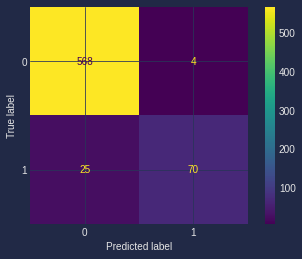


*********************************************************************************** 

classification report: 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       572
           1       0.95      0.74      0.83        95

    accuracy                           0.96       667
   macro avg       0.95      0.86      0.90       667
weighted avg       0.96      0.96      0.95       667



In [ ]:
# hyperparameter tuning

parameters= {'criterion': ['gini','entropy'],
             'bootstrap':['True','False'],
             'max_depth':[*range(1, 10000)],
             'max_features': ['auto', 'sqrt','log2'],
             'max_leaf_nodes':[*range(1, 10000)],
             'n_estimators': [*range(30, 1000)]
             }

hyper_parameter_tuning(rf_clf,parameters,X_train,y_train,X_test,y_test)

### XGBoost Classifier

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state = 0)
select_model(xgb_clf,X_train,y_train,X_test,y_test)

Accuracy score of Train: 96.88672168042011
Accuracy score of Test: 95.2023988005997


best accuracy is : 95.34884864838278
{'colsample_bytree': 0.8707977099779387, 'learning_rate': 0.09747923577040851, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 151, 'subsample': 0.3883923134045933}

*********************************************************************************** 

Validation score: 95.34885% (0.71582%)
Accuracy score: 95.80209895052474

*********************************************************************************** 

confusion matrix: 



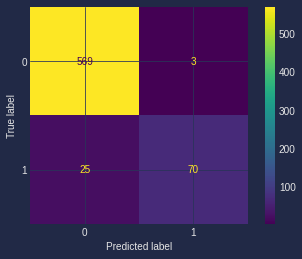


*********************************************************************************** 

classification report: 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       572
           1       0.96      0.74      0.83        95

    accuracy                           0.96       667
   macro avg       0.96      0.87      0.90       667
weighted avg       0.96      0.96      0.96       667



In [ ]:
# hyperparameter tuning


parameters = {'n_estimators': stats.randint(150, 300),
              'learning_rate': stats.uniform(0.01, 0.3),
              'subsample': stats.uniform(0.3, 0.5),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

hyper_parameter_tuning(xgb_clf,parameters,X_train,y_train,X_test,y_test)